In [1]:
import regex
import string
from nltk.corpus import wordnet

import numpy as np
import pandas as pd
from utils.contractions import contractions_dict
from joblib import Parallel, delayed

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from utils.timer import Timer
import regex

In [2]:
import utils.preprocess as preprocess

In [3]:
filepath ='/home/yiyi/Documents/masterthesis/CPD/data/cleand_query_output_csv/fc73c5ad-3748-4d31-8ab2-014c875b05d7'

- Hilton miami downtown
- 2018-01-17T16:25:00+02:00
- 527 rooms
- 35 million renovation
- mammoth shopping complex, movie theater , 
- guest rooms, meeting space, restuarant, lobby, loading dock, park ,

In [4]:
lemmas, sents, dates, scores = preprocess.get_data(filepath)

Elapsed time: 12.3205 seconds


In [5]:
sents_ =[]
for sent in sents:
    s = regex.sub(' +', ' ', sent).strip()
    sents_.append(s)

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
sent = sents_[2]

In [8]:
sent

'the pool was really fantastic and i can not stress enough how much we all enjoyed it'

In [10]:
doc = nlp(sent)
for word in doc:
    print(word.text, word.dep_)

the det
pool nsubj
was ROOT
really advmod
fantastic acomp
and cc
i nsubj
can aux
not neg
stress conj
enough advmod
how advmod
much advmod
we nsubj
all appos
enjoyed ccomp
it dobj


In [11]:
import plac
import random
import pathlib
import cytoolz
import numpy
from keras.models import Sequential, model_from_json
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.layers import TimeDistributed
from keras.optimizers import Adam
import thinc.extra.datasets
from spacy.compat import pickle
import spacy
import pandas as pd

Using TensorFlow backend.


In [12]:
from keras_spacy_SA import *

In [25]:
connectives ="and, also, besides, further, furthermore, too, moreover, in addition, then, of equal importance, equally important," +\
            " another,next, afterward, finally, later, last, lastly, at last, now, subsequently, then, when, soon, thereafter,"+\
            " after a short time, the next week, the next month, the next day, a minute later, in the meantime, meanwhile, on the following day," +\
            " at length, ultimately, presently, " +\
            "first, second, (etc.), finally, hence, next, then, from here on, to begin with, last of all, after, before, as soon as, in the end, gradually" +\
            "above, behind, below, beyond, here, there, to the right, to the left, nearby, opposite, on the other side, in the background, directly ahead, along the wall, as you turn right, at the top, across the hall, at this point, adjacent to"+\
            ",for example, to illustrate, for instance, to be specific, such as, moreover, furthermore, just as important, similarly, in the same way ,"+\
            "as a result, hence, so, accordingly, as a consequence, consequently, thus, since, therefore, for this reason, because of this,"+\
            "to this end, for this purpose, with this in mind, for this reason, for these reasons," +\
            "like, in the same manner, in the same manner way, as so, similarly,"+\
            "but, in contrast, conversely, however, still, nevertheless, nonetheless, yet, and yet, on the other hand, on the contrary, or, in spite of this, actually, in fact,"\
            +"in summary, to sum up, to repeat, briefly, in short, finally, on the whole, therefore, as I have said, in conclusion, as you can see"

In [26]:
conns = [' '+x.replace(')','').replace('(','').strip()+' ' for x in connectives.split(',')] # the connectives in the middle

In [ ]:
conns

In [37]:
sents_[:10]

['we stayed in one of the suites on the th floor',
 'two kids and and two adults',
 'the pool was really fantastic and i can not stress enough how much we all enjoyed it',
 'it has a rubberized bottom and stairs so no scuffed knees or snagged bathing suits',
 'the hotel is very close to all the family attractions we wanted to see sea aquarium jungle island but my daughter loved the pool so much she could not wait to leave the attractions to go swimming again',
 'also a porter noticed one day that my daughter looked a little down as we were getting into the elevator and did a magic trick for her that she is still talking about if you have a family this is the hotel for you',
 'my stay at the hilton in downtown miami was hell from day one',
 'because they were overboked my friends and i had to wait and come back later to get the rooms we had reserved for weeks ahead of time',
 'because the person who checked us in the manager at that messed up our confirmation numbers we had to check out

In [13]:
from itertools import chain

In [34]:
s = []
for sent in sents_:
    phrase=[]
    for conn in conns:
        if conn in sent:
            ph = [x.strip() for x in sent.split(conn) if x.strip()!='']
            phrase.append(ph)
    if phrase==[]:
        s.append(sent)
    else:
        p = list(set(chain.from_iterable(phrase)))
        s.append(p)

In [32]:
texts = ["the pool was really fantastic and i can not stress enough how much we all enjoyed it",
        "our stay at the hilton in downtown miami was hell from day one"]

In [14]:
nlp = spacy.load("en_vectors_web_lg")
nlp.add_pipe(nlp.create_pipe("sentencizer"))

##### Applying Sentiment Analyser
nlp.add_pipe(SentimentAnalyser.load('lstm_model/', nlp, max_length=128))


In [16]:
##### Getting the Polarity Score
# "docs" is a list which contains sentences we want to classify
sentiments = []
for doc in nlp.pipe(sents_):
    sentiments.append(doc.sentiment)

In [17]:
sent_df = pd.DataFrame(zip(lemmas, sents_, sentiments, dates, scores), columns=['lemma', 'sentence', 'sentiment', 'date', 'score' ])

In [42]:
pd.set_option('display.max_columns',15)
pd.set_option('display.width', 100)

In [24]:
sent_df.head()

,lemma,sentence,sentiment,date,score
0,stayed one suite floor,we stayed in one of the suites on the th floor,-0.008772,2009-08-01 00:00:00,100
1,two kid two adult,two kids and and two adults,0.015965,2009-08-01 00:00:00,100
2,pool really fantastic stress enough much enjoyed,the pool was really fantastic and i can not st...,0.490455,2009-08-01 00:00:00,100
3,rubberized bottom stair scuffed knee snagged b...,it has a rubberized bottom and stairs so no sc...,-0.485606,2009-08-01 00:00:00,100
4,hotel close family attraction wanted see sea a...,the hotel is very close to all the family attr...,0.482819,2009-08-01 00:00:00,100


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


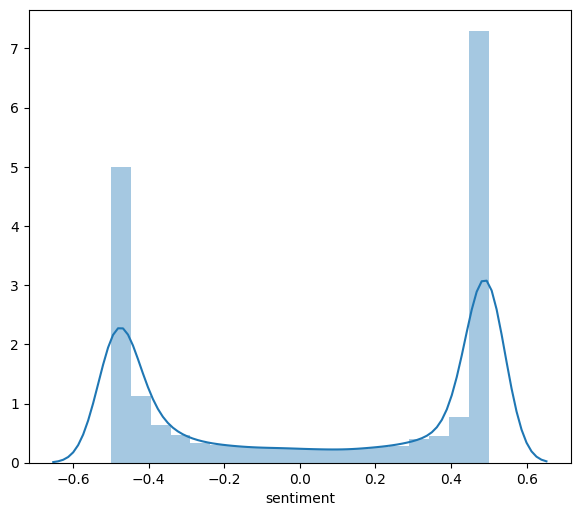

In [27]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(sent_df['sentiment'])

In [ ]:
for sent, sentiment, score, date in zip(sent_df.sentence, sent_df.sentiment, sent_df.score, sent_df.date):
    try:
        if sentiment >0.4 and score <50:
            print(sent, sentiment, score, date)
    except Exception:
        print('*'*20)
        print(sent, sentiment, score, date)

In [36]:
topic_room = []
topic_park = []
topic_meeting =[]
topic_restaurant = []
topic_lobby = []
topic_loading = []
topic_renovat = []

for sent in sent_df['sentence']:
    if 'room' in sent:
        topic_room.append(1)
    else:
        topic_room.append(0)
        
    if 'park' in sent:
        topic_park.append(1)
    else:
        topic_park.append(0)
        
    if 'meeting' in sent:
        topic_meeting.append(1)
    else:
        topic_meeting.append(0)
    
    
    if 'restaurant' in sent:
        topic_restaurant.append(1)
    else:
        topic_restaurant.append(0)
    
     
    if 'lobby' in sent:
        topic_lobby.append(1)
    else:
        topic_lobby.append(0)
    
    if 'loading' in sent:
        topic_loading.append(1)
    else:
        topic_loading.append(0)
        
    if 'renovat' in sent or 'refresh' in sent:
        topic_renovat.append(1)
    else:
        topic_renovat.append(0)
          

In [37]:
sent_df['topic_room'] = topic_room
sent_df['topic_park'] = topic_park
sent_df['topic_meeting'] = topic_meeting
sent_df['topic_restaurant'] = topic_restaurant
sent_df['topic_lobby'] = topic_lobby
sent_df['topic_loading'] = topic_loading
sent_df['topic_renovat'] = topic_renovat

In [43]:
sent_df.head(2)

,lemma,sentence,sentiment,date,score,topic_room,topic_park,topic_meeting,topic_restaurant,topic_lobby,topic_loading,topic_renovat
0,stayed one suite floor,we stayed in one of the suites on the th floor,-0.008772,2009-08-01 00:00:00,100,0,0,0,0,0,0,0
1,two kid two adult,two kids and and two adults,0.015965,2009-08-01 00:00:00,100,0,0,0,0,0,0,0


# meeting and renovation

In [90]:
meeting_related = sent_df[sent_df['topic_meeting']==1][sent_df['topic_renovat']==1]

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [91]:
len(meeting_related)

6

In [93]:
meeting_related.

3908     excellent staff great job with new renovations...
14721    good downtown location with good service neded...
15842    lobby and meeting rooms are nice but the rooms...
26561    i understand they are renovating some rooms an...
28974    nice hotel undergoing renovations busines meet...
29075    it is understandable that renovations will cau...
Name: sentence, dtype: object

# room topic and renovation

In [55]:
room_related = sent_df[sent_df['topic_room']==1][sent_df['topic_renovat']==1]

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [56]:
len(room_related)

228

In [57]:
sentiments_room = np.array(room_related['sentiment'])

In [80]:
score_corrected = np.array(room_related['sentiment']+room_related['score']*0.1)

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7fdf2119d950>])

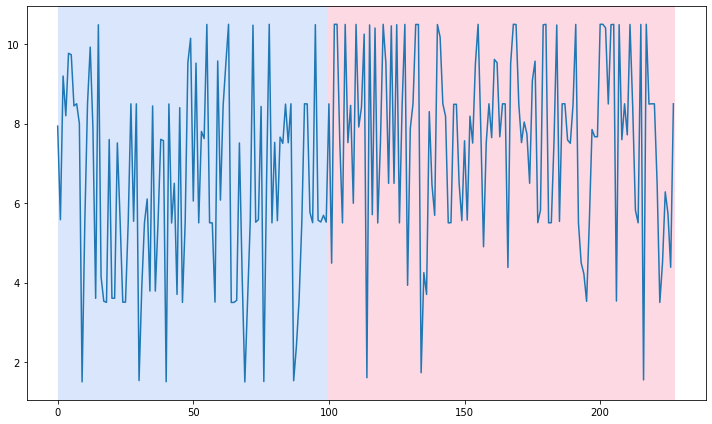

In [87]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
# creation of data

model='rbf'
n_samples = sentiments_room.shape[0]
algo = rpt.Window(width=100, model=model).fit(sentiments_room)
my_bkps= algo.predict(n_bkps=5)
rpt.show.display(score_corrected, my_bkps, figsize=(10,6))

In [88]:
room_related.iloc[200,:]

lemma                    newly renovated room
sentence            nice newly renovated room
sentiment                            0.499162
date                      2017-02-23 00:00:00
score                                     100
topic_room                                  1
topic_park                                  0
topic_meeting                               0
topic_restaurant                            0
topic_lobby                                 0
topic_loading                               0
topic_renovat                               1
Name: 30854, dtype: object

In [89]:
room_related.iloc[190,:]

lemma                                  renovated room great
sentence            we had a renovated room which was great
sentiment                                          0.479319
date                                    2017-01-24 00:00:00
score                                                    80
topic_room                                                1
topic_park                                                0
topic_meeting                                             0
topic_restaurant                                          0
topic_lobby                                               0
topic_loading                                             0
topic_renovat                                             1
Name: 30255, dtype: object

In [79]:
room_related.iloc[50,:]

lemma                        amazing room desperately need renovation
sentence            it was amazing but the room desperately needs ...
sentiment                                                   0.0536065
date                                              2015-07-05 00:00:00
score                                                              60
topic_room                                                          1
topic_park                                                          0
topic_meeting                                                       0
topic_restaurant                                                    0
topic_lobby                                                         0
topic_loading                                                       0
topic_renovat                                                       1
Name: 23179, dtype: object

In [78]:
room_related.iloc[99,:]

lemma                                 room older needed renovated
sentence            our room was older and needed to be renovated
sentiment                                                -0.47776
date                                          2016-06-22 00:00:00
score                                                          60
topic_room                                                      1
topic_park                                                      0
topic_meeting                                                   0
topic_restaurant                                                0
topic_lobby                                                     0
topic_loading                                                   0
topic_renovat                                                   1
Name: 27512, dtype: object

In [74]:
room_related.iloc[100,:]

lemma                        beautiful newly renovated room
sentence            it was a beautiful newly renovated room
sentiment                                          0.497028
date                                    2016-06-25 00:00:00
score                                                    80
topic_room                                                1
topic_park                                                0
topic_meeting                                             0
topic_restaurant                                          0
topic_lobby                                               0
topic_loading                                             0
topic_renovat                                             1
Name: 27521, dtype: object

In [76]:
room_related.iloc[120,:]

lemma               central everything two renovated corner room nice
sentence            central to everything we had two renovated cor...
sentiment                                                    0.498525
date                                              2016-08-16 00:00:00
score                                                             100
topic_room                                                          1
topic_park                                                          0
topic_meeting                                                       0
topic_restaurant                                                    0
topic_lobby                                                         0
topic_loading                                                       0
topic_renovat                                                       1
Name: 28220, dtype: object

In [59]:
sentiments_room

array([-0.06364995,  0.28369278,  0.49868709,  0.49874699,  0.46943921,
        0.43378699,  0.44644684,  0.49969959,  0.00065464, -0.49656519,
       -0.49280456,  0.49942362, -0.07522646, -0.12357309, -0.39569038,
        0.48668414,  0.14474863, -0.46825275, -0.49546623, -0.39915159,
       -0.39203703, -0.39203703, -0.48551577, -0.39654028, -0.49160868,
       -0.49160868, -0.49296084,  0.49830544, -0.45555431,  0.49742055,
       -0.46368438, -0.13133907, -0.48987776,  0.10395139, -0.21243408,
        0.44410545, -0.21243408, -0.4858321 , -0.39534697, -0.42977095,
       -0.49424231,  0.49454147, -0.49948284,  0.49821895, -0.49603626,
        0.40136778, -0.4978402 , -0.49854478, -0.46655563,  0.14780718,
        0.05360645, -0.47738206, -0.49573082, -0.49742839, -0.37659317,
        0.4964174 , -0.49400461, -0.49815229, -0.48918107, -0.42377743,
        0.0754512 ,  0.4538601 , -0.49061579,  0.49929702, -0.49952525,
       -0.49747887, -0.44587928, -0.4871141 ,  0.20792007, -0.49

In [ ]:
rpt.show.display(sentiments_room, bkps, my_bk)

In [30]:
for sent, sentiment, score, date in zip(sents_, sentiments, scores, dates):
    if sentiment >=0.2 and 'room' in sent and score <50:
        print(sent,sentiment, score, date)

on the bright side the room was nice with a beautiful view of the islands and very comfortable but service like i mention here is very very poor 0.47164827585220337 40.0 2010-06-18 00:00:00
the tv in the room was ancient 0.44547075033187866 20.0 2010-12-18 00:00:00
we finally got to our room which looked nice when we walked in 0.48888856172561646 40.0 2008-09-24 00:00:00
great room for the money first when we arrived our rooms were not ready then when we returned they had given them away 0.48932284116744995 20.0 2009-07-06 00:00:00
the tv in the room was ancient 0.44547075033187866 20.0 2010-12-18 00:00:00
this theme continues into the room 0.4307791590690613 20.0 2008-11-17 00:00:00
the hotel room was clean 0.4981542229652405 20.0 2009-07-22 00:00:00
when i returned my room was ready about minutes before 0.35833144187927246 20.0 2009-07-22 00:00:00
terable housekeeping staff check in was very nice after being in the room for sometime my elderly mother in law reached under the pillow t